# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

## Загрузка данных 

1) Посмотрим на случайные строчки.  
2) Посмотрим, есть ли в датасете незаполненные значения.

In [3]:
train = pd.read_csv('./train.csv')  # тренировочный датасет
test = pd.read_csv('./test.csv')    # тестовый датасет

In [4]:
# Для удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Выведем первые пять строк тренировочного датасета

In [6]:
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


и тестового датасета

In [7]:
test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


Выведем случайные 10 строк тренировочного датасета

In [8]:
train.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2416,72,115.75,8443.7,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
3898,32,94.80,3131.55,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,Yes,One year,No,Mailed check,0
527,56,85.85,4793.8,Male,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Mailed check,0
4938,72,25.70,1937.4,Female,1,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),0
632,72,88.70,6301.7,Male,0,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
35,58,105.50,6205.5,Female,1,Yes,No,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),1
2395,3,45.45,141.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
2046,12,26.40,314.95,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
737,2,20.00,32.7,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
2504,5,49.20,216.9,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1


Датасет содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `ClientPeriod` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlySpending` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalSpent` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Sex` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `IsSeniorCitizen` – является ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasPartner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasChild` – есть ли у клиента иждивенцы\дети (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasPhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasMultiplePhoneNumbers` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasInternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasOnlineSecurityService` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasOnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasDeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasTechSupportAccess` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasOnlineTV` – подключена ли услуга онлайн телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasMovieSubscription` – подключена ли услуга онлайн кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `HasContractPhone` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `IsBillingPaperless` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (1, 0)<br>

Определим типы данных в каждом столбце

In [9]:
train.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

Столбец "TotalSpent" относится к числовым признакам, поэтому изменим тип данных с object на float64, а все возможные пропуски значений в этом столбце заполним нулями. Т.к. пропущеные значения в данном случае будут у новых клиентов, которые ещё не успели совершить платёж.

In [10]:
train['TotalSpent'] = train['TotalSpent'].replace(r'^\s*$', 0, regex=True).astype('float')
test['TotalSpent'] = test['TotalSpent'].replace(r'^\s*$', 0, regex=True).astype('float')

Построим таблицу с количеством пропущенных значений в каждой колонке

In [11]:
train.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных 

Проведём базовый анализ

**1)** Построим на одном графике гистограммы (зелёный) для численных и столбчатые диаграммы (синий) для категориальных признаков.

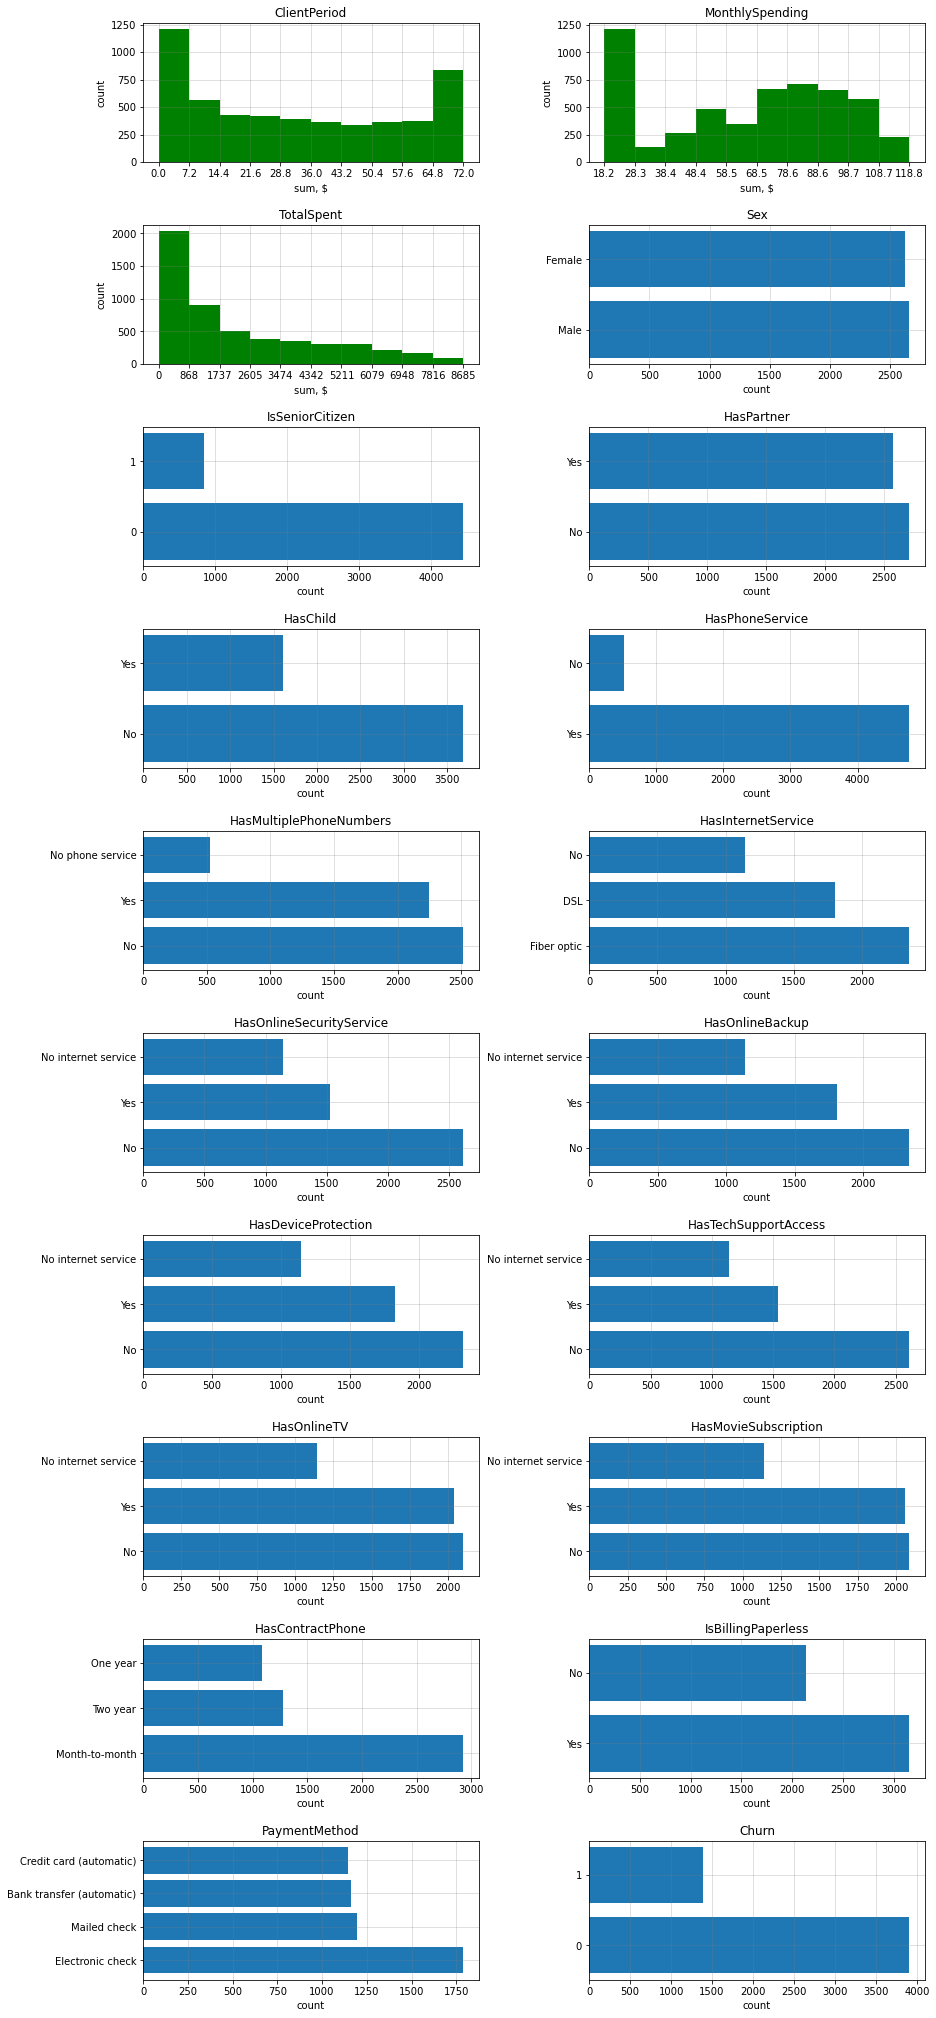

In [13]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(14, 36))
plt.subplots_adjust(wspace=0.33, hspace=0.45)

for i in range(10):
    for j in range(2):
        ax = axs[i][j]
        column = train.columns[2*i+j]
        if column in num_cols:
            _, bins, _ = ax.hist(train[column], color='green')
            ax.set_xticks(bins)
            ax.set_xlabel('sum, $')
            ax.set_ylabel('count')
        else:
            ax.barh(train[column].value_counts().index, train[column].value_counts().values)
            ax.set_yticks(train[column].value_counts().index)
            ax.set_xlabel('count')
        ax.set_title(column)
        ax.grid(linewidth=0.5, color="grey", alpha=0.5)
        
plt.show()

Получим ряд основных статистик

In [14]:
train.describe(include='number')

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.159409,0.262022
std,24.550326,30.176464,2269.049195,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [15]:
train.describe(include='object')

,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


На основе построенных графиков и полученных статистик можно сделать следующие выводы:

Около 16% всех клиентов компании являются пенсионерами. В среднем, клиенты пользуются услугами компании около 2.7 лет, средний ежемесячный платёж составляет 64.9 у.е, при максимальном 118.75 у.е. Общая сумма оплаченная за всё время в среднем составляет 2287 у.е. при максимальной 8684 у.е.

Наиболее типичным клиентом данной телекоммуникационной компании является неженатый мужчина без иждивенцев, который пользуется услугами телефонной связи без нескольких телефонных линий. Он также пользуется услугами доступа в сеть Интернет по оптическому каналу (Fiber optic) без подключения дополнительных услуг. Предпочитает ежемесячную оплату, безбумажный биллинг, оплачивая услуги связи с помощью электронного чека (Electronic check).

Основопологающими факторами лояльности клиента телеком компании являются качество и стоимость услуг. По этому проанализируем финансовые показатели и срок пользования сервисами в зависимости от оттока клиента: 

In [16]:
train.groupby('Churn')[['MonthlySpending', 'TotalSpent', 'ClientPeriod']].mean()

,MonthlySpending,TotalSpent,ClientPeriod
Churn,,,
0,61.602719,2557.914469,37.525911
1,74.281178,1525.831864,17.951590


Из полученных данных можно сделать вывод, что клиенты, которые отказались от услуг компании имели в среднем больший ежемесячный чек, но пользовались услугами компании значительно меньшее время. Ежемесячный чек может быть больше только в том случае, если пользователь потреблял больше услуг. В то же время качество предоставляемых услуг, как и их стоимость, являются одними из ключевых факторов влияющих на лояльность клиента.

**2)** Посмотрим на распределение целевой переменной

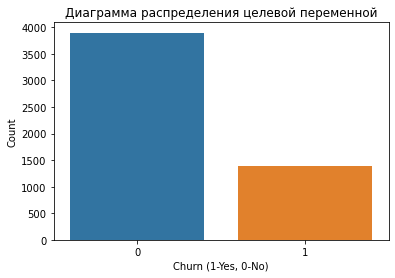

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(x=train[target_col].value_counts().index, y=train[target_col].value_counts().values)

ax.set_title('Диаграмма распределения целевой переменной')
ax.set_xlabel('Churn (1-Yes, 0-No)')
ax.set_ylabel('Count')

plt.show()

Значение оттока "0" (отток не произошёл) встречается в 2.8 раз чаще чем значение "1" (отток произошёл). Это говорит о том, что классы являются несбалансированными, но не сильно.

Проверим числовые признаки на наличие выбросов:

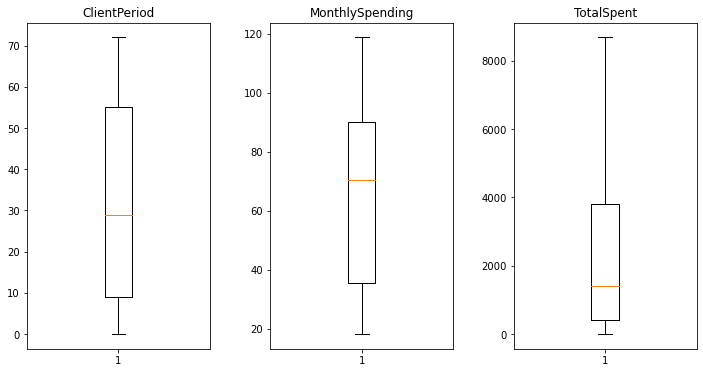

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))
plt.subplots_adjust(wspace=0.33, hspace=0.45)

for i, column in enumerate(num_cols):
    ax = axs[i]
    ax.boxplot(train[column], showfliers=True)
    ax.set_title(column)     
        
plt.show()

Выбросы не обнаружены

Построем матрицу корреляций для числовых признаков

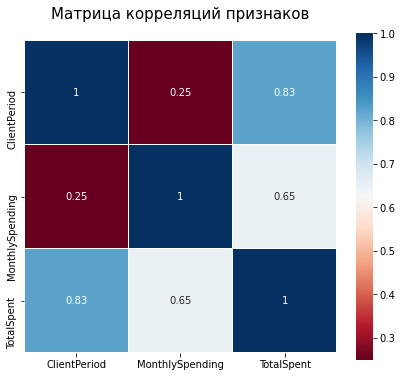

In [20]:
colormap = plt.cm.RdBu
plt.figure(figsize=(7,6))
plt.title('Матрица корреляций признаков', y=1.05, size=15)
sns.heatmap(train[num_cols].corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Столбец 'TotalSpent' является произведением столбца 'ClientPeriod' на столбец 'MonthlySpending'. По этому удалим его из датасетов.

In [21]:
def change_features(df:pd.DataFrame):
    df.drop('TotalSpent', axis=1, inplace=True)
    return df

In [22]:
train = change_features(train)
test = change_features(test)

num_cols.remove('TotalSpent')

## Применение линейных моделей

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Подготовим функцию для визуализации ROC-AUC

In [25]:
def show_ROC_AUC(model, X_train, X_test, y_train, y_test):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]
    plt.figure(figsize=(5,4))
    plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
    plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')
    plt.plot([0,1], [0,1], linestyle='--', color='black')
    plt.grid(True)
    plt.legend()
    plt.show()    
    print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
    print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')

Сделаем копии датасетов до изменений для catboost

In [26]:
cat_train = train.copy()
cat_test = test.copy()

Закодируем категориальные признаки с помощью one-hot-encoding'а

In [27]:
train = pd.get_dummies(train, columns=cat_cols, drop_first=True)
test = pd.get_dummies(test, columns=cat_cols, drop_first=True)

cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), train.columns))

Определим обучаемые признаки и целевые

In [28]:
X = train.drop(columns='Churn')
y = train.Churn

Разделим датасет на train/test выборку

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=13)

Создадим пайплайн, добавим в него нормирование признаков и определим лучшие параметры модели с помощью кросс-валидации

In [30]:
cls = make_pipeline(StandardScaler(),LogisticRegression())

param_grid = {'logisticregression__C': np.array([100, 10, 1, 0.1, 0.01, 0.001])}

LR = GridSearchCV(cls, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')
LR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])},
             scoring='roc_auc')

Выпишем какое лучшее качество и с какими параметрами удалось получить

In [31]:
print(LR.best_params_)
print(LR.best_score_)
print(LR.best_estimator_)

{'logisticregression__C': 0.1}
0.8432171532024786
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.1))])


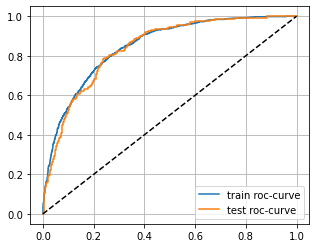

Train roc-auc: 0.847857155548372
Test roc-auc: 0.8407942098165342


In [32]:
show_ROC_AUC(LR, X_train, X_test, y_train, y_test)

Public score данной модели составил - 0.84475

## Применение градиентного бустинга

In [38]:
!pip install catboost
from catboost import CatBoostClassifier

Определим обучаемые признаки и целевые

In [39]:
cat_X = cat_train.drop(columns='Churn')
cat_y = cat_train.Churn

**1)** Разделим выборку на train/valid и протестируем catboost со стандартными параметрами

In [40]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(cat_X, cat_y, train_size=0.8, random_state=13)

In [79]:
CB_std = CatBoostClassifier()
CB_std.fit(X_train_, y_train_, cat_features=cat_cols, verbose=False);

ROC_AUC для catboost без тюнинга параметров

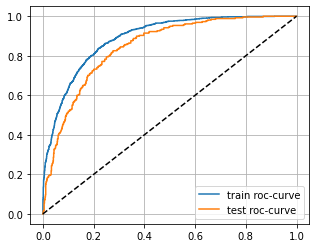

Train roc-auc: 0.8893078154472566
Test roc-auc: 0.8445998389459692


In [80]:
show_ROC_AUC(CB_std, X_train_, X_test_, y_train_, y_test_)

Public score данной модели составил - 0.85233

**2)** Протестируем разные значения параметра количества деревьев и learning_rate'а и выберем лучшую по метрике ROC-AUC комбинацию используя grid_search из библиотеки catboost.

In [81]:
CB = CatBoostClassifier(cat_features=cat_cols, verbose=False)

grid={'learning_rate': np.arange(0.01, 0.2, 0.01),
      'depth': [2, 4, 6, 8, 10],
      'l2_leaf_reg': [1, 3, 5, 7, 9],
      'iterations' : [100, 200, 300]} 

CB = CB.grid_search(grid, X_train_, y_train_, refit=True)


bestTest = 0.4731564182
bestIteration = 99

0:	loss: 0.4731564	best: 0.4731564 (0)	total: 211ms	remaining: 5m

bestTest = 0.4320417053
bestIteration = 99

1:	loss: 0.4320417	best: 0.4320417 (1)	total: 394ms	remaining: 4m 40s

bestTest = 0.4206298418
bestIteration = 99

2:	loss: 0.4206298	best: 0.4206298 (2)	total: 657ms	remaining: 5m 11s

bestTest = 0.4131809482
bestIteration = 99

3:	loss: 0.4131809	best: 0.4131809 (3)	total: 963ms	remaining: 5m 41s

bestTest = 0.411694387
bestIteration = 99

4:	loss: 0.4116944	best: 0.4116944 (4)	total: 1.26s	remaining: 5m 57s

bestTest = 0.4080397424
bestIteration = 99

5:	loss: 0.4080397	best: 0.4080397 (5)	total: 1.56s	remaining: 6m 9s

bestTest = 0.4071895045
bestIteration = 99

6:	loss: 0.4071895	best: 0.4071895 (6)	total: 1.82s	remaining: 6m 9s

bestTest = 0.4059987199
bestIteration = 98

7:	loss: 0.4059987	best: 0.4059987 (7)	total: 1.99s	remaining: 5m 53s

bestTest = 0.4075026597
bestIteration = 99

8:	loss: 0.4075027	best: 0.4059987 (7)	tot


bestTest = 0.4071968198
bestIteration = 98

72:	loss: 0.4071968	best: 0.4037930 (31)	total: 15s	remaining: 4m 37s

bestTest = 0.4067372265
bestIteration = 89

73:	loss: 0.4067372	best: 0.4037930 (31)	total: 15.2s	remaining: 4m 37s

bestTest = 0.4049968859
bestIteration = 89

74:	loss: 0.4049969	best: 0.4037930 (31)	total: 15.4s	remaining: 4m 36s

bestTest = 0.4054297346
bestIteration = 68

75:	loss: 0.4054297	best: 0.4037930 (31)	total: 15.5s	remaining: 4m 35s

bestTest = 0.4780705998
bestIteration = 99

76:	loss: 0.4780706	best: 0.4037930 (31)	total: 15.7s	remaining: 4m 34s

bestTest = 0.4311296206
bestIteration = 99

77:	loss: 0.4311296	best: 0.4037930 (31)	total: 15.9s	remaining: 4m 33s

bestTest = 0.4200719235
bestIteration = 99

78:	loss: 0.4200719	best: 0.4037930 (31)	total: 16s	remaining: 4m 33s

bestTest = 0.416243502
bestIteration = 98

79:	loss: 0.4162435	best: 0.4037930 (31)	total: 16.2s	remaining: 4m 32s

bestTest = 0.4115103357
bestIteration = 99

80:	loss: 0.4115103	best


bestTest = 0.4046483795
bestIteration = 121

142:	loss: 0.4046484	best: 0.4037930 (31)	total: 40.2s	remaining: 6m

bestTest = 0.4055589435
bestIteration = 139

143:	loss: 0.4055589	best: 0.4037930 (31)	total: 40.7s	remaining: 6m 2s

bestTest = 0.4057865133
bestIteration = 107

144:	loss: 0.4057865	best: 0.4037930 (31)	total: 41.2s	remaining: 6m 3s

bestTest = 0.4068639678
bestIteration = 97

145:	loss: 0.4068640	best: 0.4037930 (31)	total: 41.6s	remaining: 6m 4s

bestTest = 0.4041812575
bestIteration = 79

146:	loss: 0.4041813	best: 0.4037930 (31)	total: 42s	remaining: 6m 5s

bestTest = 0.4049696225
bestIteration = 98

147:	loss: 0.4049696	best: 0.4037930 (31)	total: 42.4s	remaining: 6m 6s

bestTest = 0.4052106812
bestIteration = 72

148:	loss: 0.4052107	best: 0.4037930 (31)	total: 42.8s	remaining: 6m 6s

bestTest = 0.4054067238
bestIteration = 73

149:	loss: 0.4054067	best: 0.4037930 (31)	total: 43.3s	remaining: 6m 7s

bestTest = 0.4075023129
bestIteration = 76

150:	loss: 0.4075023	


bestTest = 0.4078818478
bestIteration = 261

212:	loss: 0.4078818	best: 0.4037930 (31)	total: 1m 15s	remaining: 7m 7s

bestTest = 0.4065160066
bestIteration = 283

213:	loss: 0.4065160	best: 0.4037930 (31)	total: 1m 15s	remaining: 7m 8s

bestTest = 0.4071084326
bestIteration = 278

214:	loss: 0.4071084	best: 0.4037930 (31)	total: 1m 16s	remaining: 7m 9s

bestTest = 0.4060491173
bestIteration = 226

215:	loss: 0.4060491	best: 0.4037930 (31)	total: 1m 17s	remaining: 7m 11s

bestTest = 0.4063053072
bestIteration = 140

216:	loss: 0.4063053	best: 0.4037930 (31)	total: 1m 17s	remaining: 7m 12s

bestTest = 0.4067793868
bestIteration = 144

217:	loss: 0.4067794	best: 0.4037930 (31)	total: 1m 18s	remaining: 7m 13s

bestTest = 0.405405906
bestIteration = 110

218:	loss: 0.4054059	best: 0.4037930 (31)	total: 1m 18s	remaining: 7m 15s

bestTest = 0.4073873822
bestIteration = 114

219:	loss: 0.4073874	best: 0.4037930 (31)	total: 1m 19s	remaining: 7m 16s

bestTest = 0.4067470866
bestIteration = 134


bestTest = 0.4075404312
bestIteration = 102

281:	loss: 0.4075404	best: 0.4037930 (31)	total: 2m	remaining: 8m 9s

bestTest = 0.405036708
bestIteration = 80

282:	loss: 0.4050367	best: 0.4037930 (31)	total: 2m 1s	remaining: 8m 9s

bestTest = 0.4071914989
bestIteration = 92

283:	loss: 0.4071915	best: 0.4037930 (31)	total: 2m 2s	remaining: 8m 10s

bestTest = 0.4072061352
bestIteration = 68

284:	loss: 0.4072061	best: 0.4037930 (31)	total: 2m 2s	remaining: 8m 10s

bestTest = 0.4569284777
bestIteration = 99

285:	loss: 0.4569285	best: 0.4037930 (31)	total: 2m 2s	remaining: 8m 9s

bestTest = 0.422395439
bestIteration = 99

286:	loss: 0.4223954	best: 0.4037930 (31)	total: 2m 3s	remaining: 8m 8s

bestTest = 0.4163691585
bestIteration = 99

287:	loss: 0.4163692	best: 0.4037930 (31)	total: 2m 3s	remaining: 8m 6s

bestTest = 0.4083784801
bestIteration = 98

288:	loss: 0.4083785	best: 0.4037930 (31)	total: 2m 3s	remaining: 8m 5s

bestTest = 0.411011595
bestIteration = 99

289:	loss: 0.4110116	b


bestTest = 0.4073351774
bestIteration = 85

351:	loss: 0.4073352	best: 0.4037930 (31)	total: 2m 19s	remaining: 7m 6s

bestTest = 0.4077023051
bestIteration = 83

352:	loss: 0.4077023	best: 0.4037930 (31)	total: 2m 20s	remaining: 7m 5s

bestTest = 0.4137384693
bestIteration = 61

353:	loss: 0.4137385	best: 0.4037930 (31)	total: 2m 20s	remaining: 7m 4s

bestTest = 0.4094698679
bestIteration = 59

354:	loss: 0.4094699	best: 0.4037930 (31)	total: 2m 20s	remaining: 7m 3s

bestTest = 0.4114152198
bestIteration = 56

355:	loss: 0.4114152	best: 0.4037930 (31)	total: 2m 20s	remaining: 7m 3s

bestTest = 0.4091890047
bestIteration = 40

356:	loss: 0.4091890	best: 0.4037930 (31)	total: 2m 21s	remaining: 7m 2s

bestTest = 0.4134030851
bestIteration = 47

357:	loss: 0.4134031	best: 0.4037930 (31)	total: 2m 21s	remaining: 7m 1s

bestTest = 0.4111304626
bestIteration = 57

358:	loss: 0.4111305	best: 0.4037930 (31)	total: 2m 21s	remaining: 7m

bestTest = 0.4086263893
bestIteration = 46

359:	loss: 0.4


bestTest = 0.4087604861
bestIteration = 199

420:	loss: 0.4087605	best: 0.4037930 (31)	total: 2m 54s	remaining: 6m 57s

bestTest = 0.4066935557
bestIteration = 186

421:	loss: 0.4066936	best: 0.4037930 (31)	total: 2m 55s	remaining: 6m 57s

bestTest = 0.4077518249
bestIteration = 165

422:	loss: 0.4077518	best: 0.4037930 (31)	total: 2m 56s	remaining: 6m 57s

bestTest = 0.4066030266
bestIteration = 137

423:	loss: 0.4066030	best: 0.4037930 (31)	total: 2m 57s	remaining: 6m 57s

bestTest = 0.408379277
bestIteration = 107

424:	loss: 0.4083793	best: 0.4037930 (31)	total: 2m 57s	remaining: 6m 58s

bestTest = 0.4067170483
bestIteration = 78

425:	loss: 0.4067170	best: 0.4037930 (31)	total: 2m 58s	remaining: 6m 58s

bestTest = 0.4073553157
bestIteration = 139

426:	loss: 0.4073553	best: 0.4037930 (31)	total: 2m 59s	remaining: 6m 58s

bestTest = 0.4062500837
bestIteration = 62

427:	loss: 0.4062501	best: 0.4037930 (31)	total: 2m 59s	remaining: 6m 58s

bestTest = 0.4084422841
bestIteration = 76


bestTest = 0.4051434966
bestIteration = 43

490:	loss: 0.4051435	best: 0.4037930 (31)	total: 3m 49s	remaining: 7m 15s

bestTest = 0.4070649122
bestIteration = 52

491:	loss: 0.4070649	best: 0.4037930 (31)	total: 3m 50s	remaining: 7m 16s

bestTest = 0.4071267969
bestIteration = 54

492:	loss: 0.4071268	best: 0.4037930 (31)	total: 3m 51s	remaining: 7m 17s

bestTest = 0.4044547424
bestIteration = 32

493:	loss: 0.4044547	best: 0.4037930 (31)	total: 3m 52s	remaining: 7m 18s

bestTest = 0.4135578722
bestIteration = 299

494:	loss: 0.4135579	best: 0.4037930 (31)	total: 3m 53s	remaining: 7m 18s

bestTest = 0.4079081915
bestIteration = 290

495:	loss: 0.4079082	best: 0.4037930 (31)	total: 3m 54s	remaining: 7m 19s

bestTest = 0.4065812346
bestIteration = 222

496:	loss: 0.4065812	best: 0.4037930 (31)	total: 3m 55s	remaining: 7m 20s

bestTest = 0.4078291708
bestIteration = 237

497:	loss: 0.4078292	best: 0.4037930 (31)	total: 3m 57s	remaining: 7m 21s

bestTest = 0.4076532954
bestIteration = 168


bestTest = 0.406430197
bestIteration = 98

559:	loss: 0.4064302	best: 0.4037930 (31)	total: 5m 17s	remaining: 8m 10s

bestTest = 0.4077653731
bestIteration = 89

560:	loss: 0.4077654	best: 0.4037930 (31)	total: 5m 18s	remaining: 8m 10s

bestTest = 0.4061649683
bestIteration = 76

561:	loss: 0.4061650	best: 0.4037930 (31)	total: 5m 19s	remaining: 8m 11s

bestTest = 0.4075880047
bestIteration = 58

562:	loss: 0.4075880	best: 0.4037930 (31)	total: 5m 21s	remaining: 8m 11s

bestTest = 0.4065809561
bestIteration = 45

563:	loss: 0.4065810	best: 0.4037930 (31)	total: 5m 22s	remaining: 8m 12s

bestTest = 0.4083724659
bestIteration = 61

564:	loss: 0.4083725	best: 0.4037930 (31)	total: 5m 23s	remaining: 8m 12s

bestTest = 0.4115927997
bestIteration = 59

565:	loss: 0.4115928	best: 0.4037930 (31)	total: 5m 25s	remaining: 8m 13s

bestTest = 0.406233706
bestIteration = 52

566:	loss: 0.4062337	best: 0.4037930 (31)	total: 5m 26s	remaining: 8m 14s

bestTest = 0.4077037431
bestIteration = 53

567:	


bestTest = 0.4161893977
bestIteration = 99

629:	loss: 0.4161894	best: 0.4037930 (31)	total: 5m 47s	remaining: 7m 19s

bestTest = 0.4133602697
bestIteration = 99

630:	loss: 0.4133603	best: 0.4037930 (31)	total: 5m 48s	remaining: 7m 18s

bestTest = 0.4123743055
bestIteration = 98

631:	loss: 0.4123743	best: 0.4037930 (31)	total: 5m 48s	remaining: 7m 17s

bestTest = 0.4076361104
bestIteration = 99

632:	loss: 0.4076361	best: 0.4037930 (31)	total: 5m 48s	remaining: 7m 16s

bestTest = 0.4106134725
bestIteration = 92

633:	loss: 0.4106135	best: 0.4037930 (31)	total: 5m 49s	remaining: 7m 15s

bestTest = 0.4137948874
bestIteration = 93

634:	loss: 0.4137949	best: 0.4037930 (31)	total: 5m 49s	remaining: 7m 14s

bestTest = 0.4160929508
bestIteration = 71

635:	loss: 0.4160930	best: 0.4037930 (31)	total: 5m 49s	remaining: 7m 13s

bestTest = 0.4125948168
bestIteration = 82

636:	loss: 0.4125948	best: 0.4037930 (31)	total: 5m 49s	remaining: 7m 12s

bestTest = 0.4154743634
bestIteration = 76

637


bestTest = 0.4137807823
bestIteration = 30

699:	loss: 0.4137808	best: 0.4037930 (31)	total: 6m 38s	remaining: 6m 52s

bestTest = 0.4143838155
bestIteration = 26

700:	loss: 0.4143838	best: 0.4037930 (31)	total: 6m 39s	remaining: 6m 52s

bestTest = 0.4180683454
bestIteration = 15

701:	loss: 0.4180683	best: 0.4037930 (31)	total: 6m 40s	remaining: 6m 52s

bestTest = 0.4169949683
bestIteration = 32

702:	loss: 0.4169950	best: 0.4037930 (31)	total: 6m 41s	remaining: 6m 52s

bestTest = 0.4170090598
bestIteration = 199

703:	loss: 0.4170091	best: 0.4037930 (31)	total: 6m 42s	remaining: 6m 52s

bestTest = 0.4118893352
bestIteration = 199

704:	loss: 0.4118893	best: 0.4037930 (31)	total: 6m 43s	remaining: 6m 51s

bestTest = 0.4099374059
bestIteration = 180

705:	loss: 0.4099374	best: 0.4037930 (31)	total: 6m 44s	remaining: 6m 51s

bestTest = 0.4111199831
bestIteration = 140

706:	loss: 0.4111200	best: 0.4037930 (31)	total: 6m 45s	remaining: 6m 51s

bestTest = 0.410608954
bestIteration = 134



bestTest = 0.4101715871
bestIteration = 52

768:	loss: 0.4101716	best: 0.4037930 (31)	total: 7m 58s	remaining: 6m 48s

bestTest = 0.4143419865
bestIteration = 29

769:	loss: 0.4143420	best: 0.4037930 (31)	total: 8m	remaining: 6m 49s

bestTest = 0.4124836364
bestIteration = 63

770:	loss: 0.4124836	best: 0.4037930 (31)	total: 8m 2s	remaining: 6m 49s

bestTest = 0.4125620517
bestIteration = 51

771:	loss: 0.4125621	best: 0.4037930 (31)	total: 8m 4s	remaining: 6m 49s

bestTest = 0.4124613075
bestIteration = 40

772:	loss: 0.4124613	best: 0.4037930 (31)	total: 8m 6s	remaining: 6m 50s

bestTest = 0.410547496
bestIteration = 33

773:	loss: 0.4105475	best: 0.4037930 (31)	total: 8m 8s	remaining: 6m 50s

bestTest = 0.4124286725
bestIteration = 56

774:	loss: 0.4124287	best: 0.4037930 (31)	total: 8m 10s	remaining: 6m 51s

bestTest = 0.4146174533
bestIteration = 20

775:	loss: 0.4146175	best: 0.4037930 (31)	total: 8m 12s	remaining: 6m 51s

bestTest = 0.4112230059
bestIteration = 34

776:	loss: 0


bestTest = 0.4095237687
bestIteration = 238

838:	loss: 0.4095238	best: 0.4037930 (31)	total: 10m 7s	remaining: 7m 4s

bestTest = 0.4104051302
bestIteration = 151

839:	loss: 0.4104051	best: 0.4037930 (31)	total: 10m 9s	remaining: 7m 4s

bestTest = 0.4093044447
bestIteration = 169

840:	loss: 0.4093044	best: 0.4037930 (31)	total: 10m 11s	remaining: 7m 4s

bestTest = 0.4101309805
bestIteration = 86

841:	loss: 0.4101310	best: 0.4037930 (31)	total: 10m 12s	remaining: 7m 4s

bestTest = 0.4089489435
bestIteration = 82

842:	loss: 0.4089489	best: 0.4037930 (31)	total: 10m 14s	remaining: 7m 4s

bestTest = 0.4096690191
bestIteration = 93

843:	loss: 0.4096690	best: 0.4037930 (31)	total: 10m 17s	remaining: 7m 4s

bestTest = 0.4100666131
bestIteration = 78

844:	loss: 0.4100666	best: 0.4037930 (31)	total: 10m 18s	remaining: 7m 4s

bestTest = 0.4101774136
bestIteration = 31

845:	loss: 0.4101774	best: 0.4037930 (31)	total: 10m 20s	remaining: 7m 4s

bestTest = 0.40901709
bestIteration = 58

846:


bestTest = 0.422990691
bestIteration = 15

907:	loss: 0.4229907	best: 0.4037930 (31)	total: 11m	remaining: 6m 16s

bestTest = 0.4230295464
bestIteration = 52

908:	loss: 0.4230295	best: 0.4037930 (31)	total: 11m 1s	remaining: 6m 15s

bestTest = 0.4230454027
bestIteration = 16

909:	loss: 0.4230454	best: 0.4037930 (31)	total: 11m 1s	remaining: 6m 14s

bestTest = 0.422043216
bestIteration = 12

910:	loss: 0.4220432	best: 0.4037930 (31)	total: 11m 2s	remaining: 6m 13s

bestTest = 0.4218612346
bestIteration = 12

911:	loss: 0.4218612	best: 0.4037930 (31)	total: 11m 2s	remaining: 6m 12s

bestTest = 0.4510930867
bestIteration = 99

912:	loss: 0.4510931	best: 0.4037930 (31)	total: 11m 3s	remaining: 6m 11s

bestTest = 0.4194368108
bestIteration = 99

913:	loss: 0.4194368	best: 0.4037930 (31)	total: 11m 3s	remaining: 6m 10s

bestTest = 0.4161539497
bestIteration = 99

914:	loss: 0.4161539	best: 0.4037930 (31)	total: 11m 3s	remaining: 6m 9s

bestTest = 0.4139926542
bestIteration = 97

915:	loss


bestTest = 0.4161765485
bestIteration = 35

976:	loss: 0.4161765	best: 0.4037930 (31)	total: 12m 3s	remaining: 5m 31s

bestTest = 0.4155598032
bestIteration = 26

977:	loss: 0.4155598	best: 0.4037930 (31)	total: 12m 4s	remaining: 5m 31s

bestTest = 0.4137390412
bestIteration = 32

978:	loss: 0.4137390	best: 0.4037930 (31)	total: 12m 6s	remaining: 5m 30s

bestTest = 0.4144995242
bestIteration = 41

979:	loss: 0.4144995	best: 0.4037930 (31)	total: 12m 8s	remaining: 5m 30s

bestTest = 0.4141534738
bestIteration = 37

980:	loss: 0.4141535	best: 0.4037930 (31)	total: 12m 9s	remaining: 5m 30s

bestTest = 0.4156962463
bestIteration = 27

981:	loss: 0.4156962	best: 0.4037930 (31)	total: 12m 11s	remaining: 5m 29s

bestTest = 0.4164945809
bestIteration = 13

982:	loss: 0.4164946	best: 0.4037930 (31)	total: 12m 13s	remaining: 5m 29s

bestTest = 0.4177004385
bestIteration = 21

983:	loss: 0.4177004	best: 0.4037930 (31)	total: 12m 14s	remaining: 5m 29s

bestTest = 0.4175556568
bestIteration = 22




bestTest = 0.4153545067
bestIteration = 299

1045:	loss: 0.4153545	best: 0.4037930 (31)	total: 13m 59s	remaining: 5m 4s

bestTest = 0.4148658823
bestIteration = 171

1046:	loss: 0.4148659	best: 0.4037930 (31)	total: 14m 1s	remaining: 5m 3s

bestTest = 0.4135896515
bestIteration = 132

1047:	loss: 0.4135897	best: 0.4037930 (31)	total: 14m 4s	remaining: 5m 3s

bestTest = 0.416191198
bestIteration = 83

1048:	loss: 0.4161912	best: 0.4037930 (31)	total: 14m 6s	remaining: 5m 3s

bestTest = 0.4148210467
bestIteration = 67

1049:	loss: 0.4148210	best: 0.4037930 (31)	total: 14m 9s	remaining: 5m 3s

bestTest = 0.4156895549
bestIteration = 63

1050:	loss: 0.4156896	best: 0.4037930 (31)	total: 14m 12s	remaining: 5m 3s

bestTest = 0.4157502811
bestIteration = 36

1051:	loss: 0.4157503	best: 0.4037930 (31)	total: 14m 14s	remaining: 5m 3s

bestTest = 0.4142482947
bestIteration = 48

1052:	loss: 0.4142483	best: 0.4037930 (31)	total: 14m 17s	remaining: 5m 2s

bestTest = 0.4189962846
bestIteration = 2


bestTest = 0.4138631839
bestIteration = 28

1113:	loss: 0.4138632	best: 0.4037930 (31)	total: 16m 59s	remaining: 4m 44s

bestTest = 0.412522869
bestIteration = 30

1114:	loss: 0.4125229	best: 0.4037930 (31)	total: 17m 1s	remaining: 4m 44s

bestTest = 0.4145322858
bestIteration = 41

1115:	loss: 0.4145323	best: 0.4037930 (31)	total: 17m 4s	remaining: 4m 43s

bestTest = 0.415072771
bestIteration = 34

1116:	loss: 0.4150728	best: 0.4037930 (31)	total: 17m 7s	remaining: 4m 43s

bestTest = 0.4148145526
bestIteration = 23

1117:	loss: 0.4148146	best: 0.4037930 (31)	total: 17m 10s	remaining: 4m 42s

bestTest = 0.4185408994
bestIteration = 14

1118:	loss: 0.4185409	best: 0.4037930 (31)	total: 17m 12s	remaining: 4m 42s

bestTest = 0.421725809
bestIteration = 32

1119:	loss: 0.4217258	best: 0.4037930 (31)	total: 17m 15s	remaining: 4m 42s

bestTest = 0.416617805
bestIteration = 12

1120:	loss: 0.4166178	best: 0.4037930 (31)	total: 17m 18s	remaining: 4m 41s

bestTest = 0.4150217177
bestIteration 


bestTest = 0.4161568841
bestIteration = 86

1181:	loss: 0.4161569	best: 0.4037930 (31)	total: 18m 38s	remaining: 3m 49s

bestTest = 0.4193528621
bestIteration = 86

1182:	loss: 0.4193529	best: 0.4037930 (31)	total: 18m 38s	remaining: 3m 48s

bestTest = 0.4188758388
bestIteration = 77

1183:	loss: 0.4188758	best: 0.4037930 (31)	total: 18m 39s	remaining: 3m 47s

bestTest = 0.4201107991
bestIteration = 30

1184:	loss: 0.4201108	best: 0.4037930 (31)	total: 18m 39s	remaining: 3m 46s

bestTest = 0.416697344
bestIteration = 39

1185:	loss: 0.4166973	best: 0.4037930 (31)	total: 18m 40s	remaining: 3m 45s

bestTest = 0.4216738885
bestIteration = 32

1186:	loss: 0.4216739	best: 0.4037930 (31)	total: 18m 40s	remaining: 3m 44s

bestTest = 0.4217307897
bestIteration = 39

1187:	loss: 0.4217308	best: 0.4037930 (31)	total: 18m 41s	remaining: 3m 43s

bestTest = 0.4189330238
bestIteration = 36

1188:	loss: 0.4189330	best: 0.4037930 (31)	total: 18m 42s	remaining: 3m 42s

bestTest = 0.4258684149
bestIter


bestTest = 0.4186329607
bestIteration = 26

1250:	loss: 0.4186330	best: 0.4037930 (31)	total: 19m 47s	remaining: 2m 45s

bestTest = 0.4234736001
bestIteration = 17

1251:	loss: 0.4234736	best: 0.4037930 (31)	total: 19m 49s	remaining: 2m 44s

bestTest = 0.4255599735
bestIteration = 6

1252:	loss: 0.4255600	best: 0.4037930 (31)	total: 19m 52s	remaining: 2m 43s

bestTest = 0.4196668873
bestIteration = 8

1253:	loss: 0.4196669	best: 0.4037930 (31)	total: 19m 54s	remaining: 2m 42s

bestTest = 0.4205172079
bestIteration = 199

1254:	loss: 0.4205172	best: 0.4037930 (31)	total: 19m 56s	remaining: 2m 42s

bestTest = 0.4169272046
bestIteration = 143

1255:	loss: 0.4169272	best: 0.4037930 (31)	total: 19m 58s	remaining: 2m 41s

bestTest = 0.4186254141
bestIteration = 78

1256:	loss: 0.4186254	best: 0.4037930 (31)	total: 20m	remaining: 2m 40s

bestTest = 0.415933474
bestIteration = 71

1257:	loss: 0.4159335	best: 0.4037930 (31)	total: 20m 2s	remaining: 2m 39s

bestTest = 0.4142510991
bestIteration


bestTest = 0.4130700323
bestIteration = 68

1318:	loss: 0.4130700	best: 0.4037930 (31)	total: 22m 30s	remaining: 1m 48s

bestTest = 0.4108259558
bestIteration = 46

1319:	loss: 0.4108260	best: 0.4037930 (31)	total: 22m 33s	remaining: 1m 47s

bestTest = 0.4133310453
bestIteration = 50

1320:	loss: 0.4133310	best: 0.4037930 (31)	total: 22m 36s	remaining: 1m 46s

bestTest = 0.4102573173
bestIteration = 44

1321:	loss: 0.4102573	best: 0.4037930 (31)	total: 22m 38s	remaining: 1m 45s

bestTest = 0.4158186898
bestIteration = 19

1322:	loss: 0.4158187	best: 0.4037930 (31)	total: 22m 40s	remaining: 1m 44s

bestTest = 0.4137136884
bestIteration = 34

1323:	loss: 0.4137137	best: 0.4037930 (31)	total: 22m 42s	remaining: 1m 43s

bestTest = 0.4160136299
bestIteration = 27

1324:	loss: 0.4160136	best: 0.4037930 (31)	total: 22m 44s	remaining: 1m 43s

bestTest = 0.4176360149
bestIteration = 15

1325:	loss: 0.4176360	best: 0.4037930 (31)	total: 22m 47s	remaining: 1m 42s

bestTest = 0.418898102
bestIter


bestTest = 0.4164112017
bestIteration = 297

1387:	loss: 0.4164112	best: 0.4037930 (31)	total: 26m 37s	remaining: 42.6s

bestTest = 0.4187861816
bestIteration = 295

1388:	loss: 0.4187862	best: 0.4037930 (31)	total: 26m 39s	remaining: 41.5s

bestTest = 0.4157731734
bestIteration = 108

1389:	loss: 0.4157732	best: 0.4037930 (31)	total: 26m 42s	remaining: 40.4s

bestTest = 0.4167391957
bestIteration = 116

1390:	loss: 0.4167392	best: 0.4037930 (31)	total: 26m 45s	remaining: 39.2s

bestTest = 0.4136038693
bestIteration = 63

1391:	loss: 0.4136039	best: 0.4037930 (31)	total: 26m 49s	remaining: 38.1s

bestTest = 0.4142252477
bestIteration = 42

1392:	loss: 0.4142252	best: 0.4037930 (31)	total: 26m 52s	remaining: 37s

bestTest = 0.4164085996
bestIteration = 46

1393:	loss: 0.4164086	best: 0.4037930 (31)	total: 26m 56s	remaining: 36s

bestTest = 0.417963284
bestIteration = 34

1394:	loss: 0.4179633	best: 0.4037930 (31)	total: 27m	remaining: 34.9s

bestTest = 0.415171293
bestIteration = 25

1

Выпишем какое лучшее качество и с какими параметрами удалось получить

In [83]:
CB['params']  # параметры после GridSearch

{'depth': 2, 'l2_leaf_reg': 3, 'iterations': 100, 'learning_rate': 0.13}

Но точность на Kaggle оказалась выше со следующими параметрами:

In [107]:
CB_model = CatBoostClassifier(iterations=300, learning_rate=0.10, depth=2, l2_leaf_reg=3, cat_features=cat_cols)
CB_model.fit(X_train_, y_train_)

0:	learn: 0.6500551	total: 3.01ms	remaining: 901ms
1:	learn: 0.6141160	total: 5.93ms	remaining: 883ms
2:	learn: 0.5892238	total: 8.81ms	remaining: 872ms
3:	learn: 0.5694048	total: 11ms	remaining: 816ms
4:	learn: 0.5503191	total: 13.4ms	remaining: 793ms
5:	learn: 0.5361490	total: 15.8ms	remaining: 774ms
6:	learn: 0.5161061	total: 18ms	remaining: 752ms
7:	learn: 0.4988224	total: 20ms	remaining: 728ms
8:	learn: 0.4857195	total: 22ms	remaining: 710ms
9:	learn: 0.4759092	total: 23.9ms	remaining: 692ms
10:	learn: 0.4669522	total: 25.8ms	remaining: 677ms
11:	learn: 0.4601784	total: 27.8ms	remaining: 668ms
12:	learn: 0.4551950	total: 30.2ms	remaining: 667ms
13:	learn: 0.4502983	total: 32.1ms	remaining: 656ms
14:	learn: 0.4471079	total: 34.2ms	remaining: 650ms
15:	learn: 0.4441561	total: 36.6ms	remaining: 651ms
16:	learn: 0.4408536	total: 38.8ms	remaining: 646ms
17:	learn: 0.4388389	total: 40.8ms	remaining: 640ms
18:	learn: 0.4367658	total: 43.1ms	remaining: 638ms
19:	learn: 0.4348369	total: 45

182:	learn: 0.3995074	total: 397ms	remaining: 254ms
183:	learn: 0.3994185	total: 399ms	remaining: 252ms
184:	learn: 0.3993166	total: 401ms	remaining: 249ms
185:	learn: 0.3991937	total: 404ms	remaining: 247ms
186:	learn: 0.3991489	total: 406ms	remaining: 245ms
187:	learn: 0.3991216	total: 408ms	remaining: 243ms
188:	learn: 0.3991180	total: 410ms	remaining: 241ms
189:	learn: 0.3991130	total: 412ms	remaining: 239ms
190:	learn: 0.3990806	total: 414ms	remaining: 236ms
191:	learn: 0.3990728	total: 416ms	remaining: 234ms
192:	learn: 0.3990697	total: 419ms	remaining: 233ms
193:	learn: 0.3989673	total: 422ms	remaining: 230ms
194:	learn: 0.3989435	total: 424ms	remaining: 228ms
195:	learn: 0.3989095	total: 427ms	remaining: 227ms
196:	learn: 0.3987478	total: 429ms	remaining: 224ms
197:	learn: 0.3986638	total: 432ms	remaining: 222ms
198:	learn: 0.3986470	total: 434ms	remaining: 220ms
199:	learn: 0.3986257	total: 437ms	remaining: 218ms
200:	learn: 0.3985387	total: 439ms	remaining: 216ms
201:	learn: 

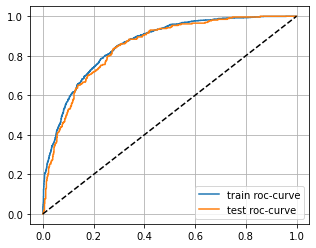

Train roc-auc: 0.860319492278779
Test roc-auc: 0.8481653423368358


In [108]:
show_ROC_AUC(CB_model, X_train_, X_test_, y_train_, y_test_)

Public score данной модели составил - 0.85432

# Дополнительные модели

Попробуем обучить ещё несколько дополнительных моделей

## ADA Boost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
ADA = AdaBoostClassifier(random_state=13)

ada_grid = {'n_estimators': range(1, 100, 1), 'learning_rate': np.arange(0.1, 2, 0.05)}

ADA = GridSearchCV(ADA, ada_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')
ADA.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=13), n_jobs=-1,
             param_grid={'learning_rate': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 ,
       1.75, 1.8 , 1.85, 1.9 , 1.95]),
                         'n_estimators': range(1, 100)},
             scoring='roc_auc')

In [52]:
print(ADA.best_params_)
print(ADA.best_score_)
print(ADA.best_estimator_)

{'learning_rate': 0.25000000000000006, 'n_estimators': 53}
0.8445327353485714
AdaBoostClassifier(learning_rate=0.25000000000000006, n_estimators=53,
                   random_state=13)


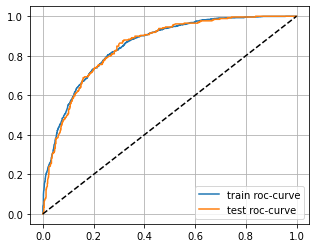

Train roc-auc: 0.8530080751425573
Test roc-auc: 0.8495430334429664


In [53]:
show_ROC_AUC(ADA, X_train, X_test, y_train, y_test)

Public score данной модели составил - 0.82981

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
RFC = RandomForestClassifier(n_jobs=-1, random_state=13)

rfc_grid = {'n_estimators': range(1, 160, 5), 'min_samples_leaf': range(1,50)}

RFC = GridSearchCV(RFC, rfc_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')
RFC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 50),
                         'n_estimators': range(1, 160, 5)},
             scoring='roc_auc')

In [64]:
print(RFC.best_params_)
print(RFC.best_score_)
print(RFC.best_estimator_)

{'min_samples_leaf': 21, 'n_estimators': 121}
0.8431943191191407
RandomForestClassifier(min_samples_leaf=21, n_estimators=121, n_jobs=-1,
                       random_state=13)


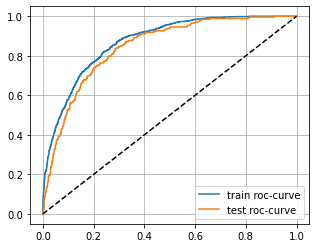

Train roc-auc: 0.871985720483947
Test roc-auc: 0.845861105451582


In [65]:
show_ROC_AUC(RFC, X_train, X_test, y_train, y_test)

Public score данной модели составил - 0.81594

## Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
GBC = GradientBoostingClassifier(random_state=13)

gbc_grid = {'n_estimators': range(1, 100, 1), 
            'learning_rate': np.arange(0.1, 0.2, 0.1), 
            'subsample': np.arange(0.1, 1, 0.1), 
            'loss': ('deviance', 'exponential')}

GBC = GridSearchCV(GBC, gbc_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')
GBC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=13),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'loss': ('deviance', 'exponential'),
                         'n_estimators': range(1, 100),
                         'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='roc_auc')

In [70]:
print(GBC.best_params_)
print(GBC.best_score_)
print(GBC.best_estimator_)

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 44, 'subsample': 0.6}
0.8448241357960068
GradientBoostingClassifier(n_estimators=44, random_state=13, subsample=0.6)


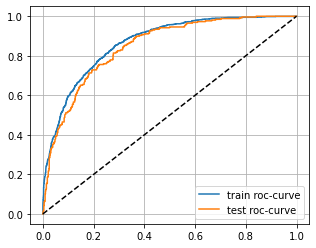

Train roc-auc: 0.8657644389956767
Test roc-auc: 0.84719998835754


In [71]:
show_ROC_AUC(GBC, X_train, X_test, y_train, y_test)

Public score данной модели составил - 0.77936

# Предсказания

In [109]:
best_model = CB_model

In [110]:
# X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(cat_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Вывод

* Максимальную точность показала модель CatBoost после подбора параметров - 0.85432